# Exploratory Data Analysis

In [1]:
# Import necessary packages
import csv
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Load Data
df = pd.read_csv("Raw_Patent_2022.csv")
df.head()

,web-scraper-order,web-scraper-start-url,Patent Link,Patent Link-href,Patent ID,Title,IPC Classifications,CPC Classifications,Owners,Family Jurisdiction,Granted Date,Publication Date,Abstract,Claims
0,1685901346-1,https://www.lens.org/lens/search/patent/list?q...,Processor compiler,https://www.lens.org/lens/patent/195-213-523-5...,US 11216734 B1,Processor compiler,G06N5/02\n \n \n...,G06N5/022\n \n \...,Groq Inc,US,"Granted: \n Jan 4, 2022","Published: \n Jan 4, 2022",A system receives a predictive model and recei...,"A method, comprising:\nmeasuring, by a compile..."
1,1685901349-2,https://www.lens.org/lens/search/patent/list?q...,Image sensing device,https://www.lens.org/lens/patent/188-138-478-2...,US 11217616 B2,Image sensing device,H01L27/146,H01L27/14621\n \n ...,Sk Hynix Inc,"CN, US, KR","Granted: \n Jan 4, 2022","Published: \n Jan 4, 2022",An image sensing device includes a substrate l...,An image sensing device comprising:\na substra...
2,1685901351-3,https://www.lens.org/lens/search/patent/list?q...,Antigen specific immunotherapy for COVID-19 fu...,https://www.lens.org/lens/patent/184-502-996-0...,US 11213581 B2,Antigen specific immunotherapy for COVID-19 fu...,A61K39/215\n \n ...,C07K14/005\n \n ...,Akston Biosciences Corporation\n ...,"US, AU, CA, CN, IL, BR, KR, EP, WO","Granted: \n Jan 4, 2022","Published: \n Jan 4, 2022",The present disclosure provides recombinantly ...,A fusion protein comprising a viral receptor b...
3,1685901353-4,https://www.lens.org/lens/search/patent/list?q...,Security de-escalation for data access,https://www.lens.org/lens/patent/184-235-958-5...,US 11218491 B2,Security de-escalation for data access,G06F21/62,H04L63/105\n \n ...,At&t Intellectual Property I l.p,US,"Granted: \n Jan 4, 2022","Published: \n Jan 4, 2022",The concepts and technologies disclosed herein...,"A method comprising:\ndefining, by a user devi..."
4,1685901357-5,https://www.lens.org/lens/search/patent/list?q...,System and method for secure cloud-based physi...,https://www.lens.org/lens/patent/174-886-323-4...,US 11213237 B2,System and method for secure cloud-based physi...,A61B90/90\n \n \...,G06F21/32\n \n \...,Bardy Diagnostics Inc,US,"Granted: \n Jan 4, 2022","Published: \n Jan 4, 2022",Electronic medical records (EMRs) with the res...,A system for secure cloud-based physiological ...


In [13]:
# Check the data types of each column
data_types = df.dtypes
print("Data types:")
print(data_types)

Data types:
web-scraper-order        object
web-scraper-start-url    object
Patent Link              object
Patent Link-href         object
Patent ID                object
Title                    object
IPC Classifications      object
CPC Classifications      object
Owners                   object
Family Jurisdiction      object
Granted Date             object
Publication Date         object
Abstract                 object
Claims                   object
dtype: object


In [37]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
web-scraper-order          0
web-scraper-start-url      0
Patent Link                0
Patent Link-href           0
Patent ID                 38
Title                     38
IPC Classifications       38
CPC Classifications       38
Owners                    38
Family Jurisdiction       38
Granted Date              38
Publication Date          38
Abstract                   0
Claims                   176
dtype: int64


In [ ]:
missing_values = df.isnull().sum()

In [38]:
# Calculate the proportion of missing data for each variable
total_values = df.shape[0]
proportion_missing = (missing_values / total_values) * 0.1

In [61]:
# Create a DataFrame to hold the missing data information
missing_data_df = pd.DataFrame({'Variable': missing_values.index, 'Proportion of Missing Values': proportion_missing.values})

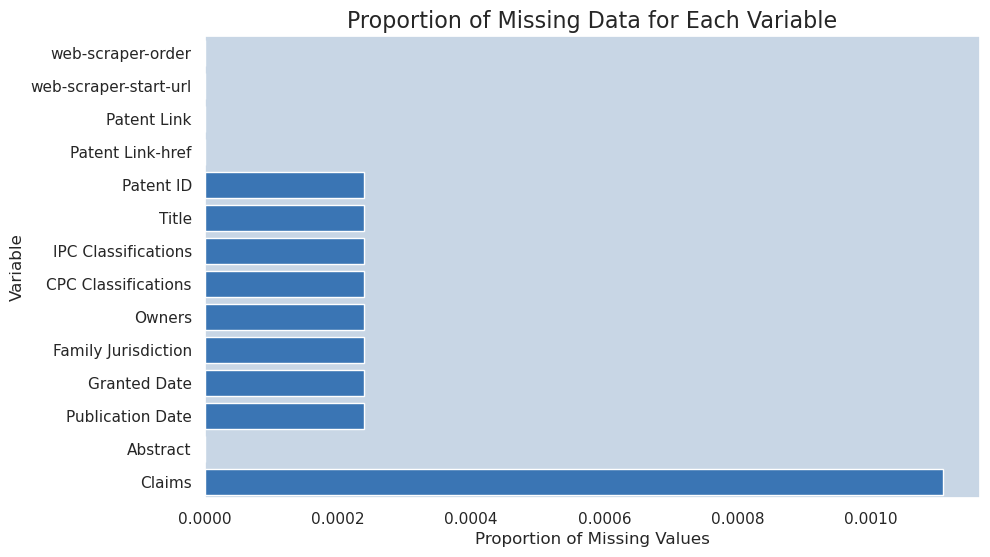

In [62]:
# Set the background color to blue
sns.set(style="dark", rc={'axes.facecolor': '#C8D6E5'})

# Create a horizontal barplot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_data_df, x='Proportion of Missing Values', y='Variable', color='#2674C8')
plt.title("Proportion of Missing Data for Each Variable", fontsize=16)
plt.xlabel('Proportion of Missing Values', fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.show()

In [63]:
# Check the number of rows before cleaning missing values
num_rows_before = len(df)

# Print the results
print("Number of rows before cleaning:", num_rows_before)

Number of rows before cleaning: 15870


In [64]:
# Drop the rows with missing values
df = df.dropna(subset = ['Patent ID', 'Title', 'IPC Classifications', 'CPC Classifications',
                       'Owners', 'Family Jurisdiction', 'Granted Date', 'Publication Date', 'Claims'])

# Check for missing values
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [65]:
# Drop the first three columns
df = df.iloc[:, 4:]

In [66]:
# Remove "Granted:" from "Granted Date" column
df["Granted Date"] = df["Granted Date"].str.replace("Granted:", "")

# Remove "Published:" from "Publication Date" column
df["Publication Date"] = df["Publication Date"].str.replace("Published:", "")

In [67]:
# Remove "\n" and replace with a space in all columns
df = df.replace("\n", " ", regex = True)
df.head()

,Patent ID,Title,IPC Classifications,CPC Classifications,Owners,Family Jurisdiction,Granted Date,Publication Date,Abstract,Claims
0,US 11216734 B1,Processor compiler,G06N5/02 ...,G06N5/022 ...,Groq Inc,US,"Jan 4, 2022","Jan 4, 2022",A system receives a predictive model and recei...,"A method, comprising: measuring, by a compiler..."
1,US 11217616 B2,Image sensing device,H01L27/146,H01L27/14621 ...,Sk Hynix Inc,"CN, US, KR","Jan 4, 2022","Jan 4, 2022",An image sensing device includes a substrate l...,An image sensing device comprising: a substrat...
2,US 11213581 B2,Antigen specific immunotherapy for COVID-19 fu...,A61K39/215 ...,C07K14/005 ...,Akston Biosciences Corporation ...,"US, AU, CA, CN, IL, BR, KR, EP, WO","Jan 4, 2022","Jan 4, 2022",The present disclosure provides recombinantly ...,A fusion protein comprising a viral receptor b...
3,US 11218491 B2,Security de-escalation for data access,G06F21/62,H04L63/105 ...,At&t Intellectual Property I l.p,US,"Jan 4, 2022","Jan 4, 2022",The concepts and technologies disclosed herein...,"A method comprising: defining, by a user devic..."
4,US 11213237 B2,System and method for secure cloud-based physi...,A61B90/90 ...,G06F21/32 ...,Bardy Diagnostics Inc,US,"Jan 4, 2022","Jan 4, 2022",Electronic medical records (EMRs) with the res...,A system for secure cloud-based physiological ...


In [68]:
# Save the modified DataFrame to a new CSV file
output_filename = "Cleaned_Patent_2022.csv"
df.to_csv(output_filename, index = False)

# Data Overview - Class Distribution

In [69]:
# Extract the letter portion of the classification codes
df["Class Letter"] = df["IPC Classifications"].str.extract(r'^([A-H])')

# Check the class distribution based on the letter portion
class_distribution = df["Class Letter"].value_counts().sort_index()

# Print the class distribution
print("Class Distribution based on Letter:")
print(class_distribution)

Class Distribution based on Letter:
A    7306
B     260
C     678
D       5
E       1
F      36
G    4935
H    2473
Name: Class Letter, dtype: int64


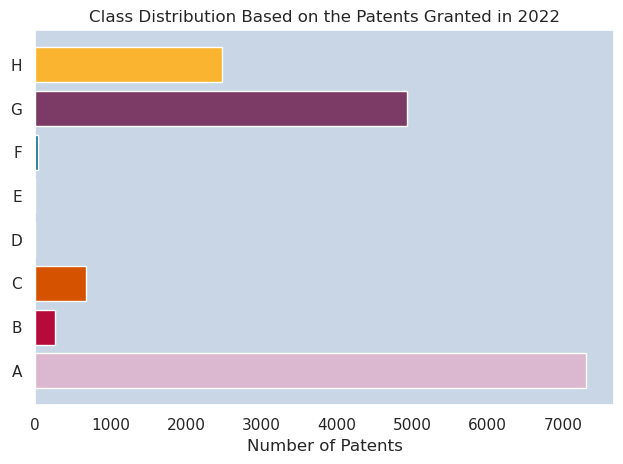

In [70]:
# Define the class labels and their corresponding categories
class_labels = ["A", "B", "C", "D", "E", "F", "G", "H"]

# Assuming you have the 'class_distribution' data somewhere before this point
# It should be a list of integers representing the count for each class label

# Define the color for each bar
colors = ['#DBB8CF', '#B60A3B', '#D45200', '#F539C1', '#5A7356', '#006B8F', '#7B3B66', '#FBB430']

# Create the bar chart
plt.barh(class_labels, class_distribution, color=colors)

# Set the y-axis labels as the class categories
plt.yticks(class_labels)

# Set the x-axis label
plt.xlabel("Number of Patents")

# Set the chart title
plt.title("Class Distribution Based on the Patents Granted in 2022")

# Display the bar chart
plt.tight_layout()  # This adjusts the layout to prevent clipping of labels
plt.show()


# Data Overview - Feature Analysis

## Patent ID

In [71]:
unique_count = df["Patent ID"].nunique()
total_count = len(df)

if unique_count == total_count:
    print("Each ID corresponds to a single patent.")
else:
    print("There are potential duplicates in the Patent ID.")

Each ID corresponds to a single patent.


## Title 

In [72]:
# Combine all titles into a single string
titles = ' '.join(df["Title"].dropna())

# Split the titles into individual words
words = titles.split()

# Calculate word frequencies
word_freq = Counter(words)

# Print the most common keywords
common_keywords = word_freq.most_common(10)
print("Common Keywords:")
for keyword, frequency in common_keywords:
    print(keyword, "-", frequency)

Common Keywords:
and - 10184
for - 7515
of - 4026
a - 2464
method - 2391
methods - 2151
system - 2105
device - 2047
in - 1487
with - 1338


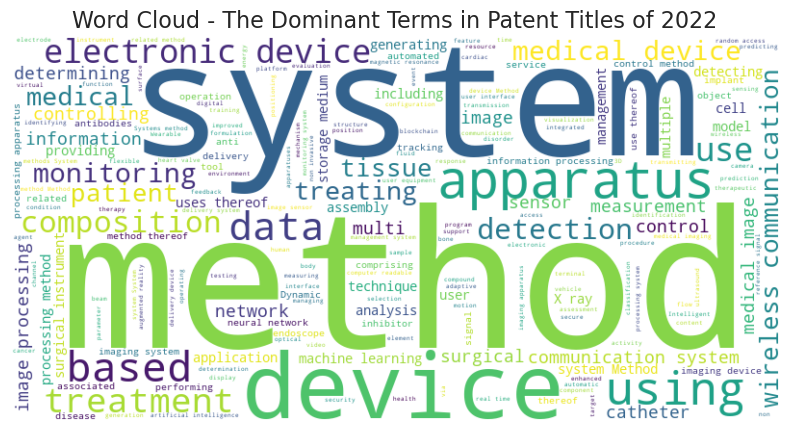

In [86]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - The Dominant Terms in Patent Titles of 2022", fontsize=16)
plt.show()

## Owners

In [74]:
owner_frequencies = df["Owners"].value_counts()

# Print the top 10 frequent owners
print("Top 10 Frequent Owners:")
print(owner_frequencies.head(10))

Top 10 Frequent Owners:
Qualcomm Incorporated                          727
Samsung Electronics Co. Ltd                    595
International Business Machines Corporation    267
Koninklijke Philips n.v                        240
Ethicon Llc                     ,              239
Covidien Lp                                    164
Lg Electronics Inc                             145
Beijing Xiaomi Mobile Software Co. Ltd         123
Medtronic Inc                                  117
Boston Scientific Scimed Inc                   104
Name: Owners, dtype: int64


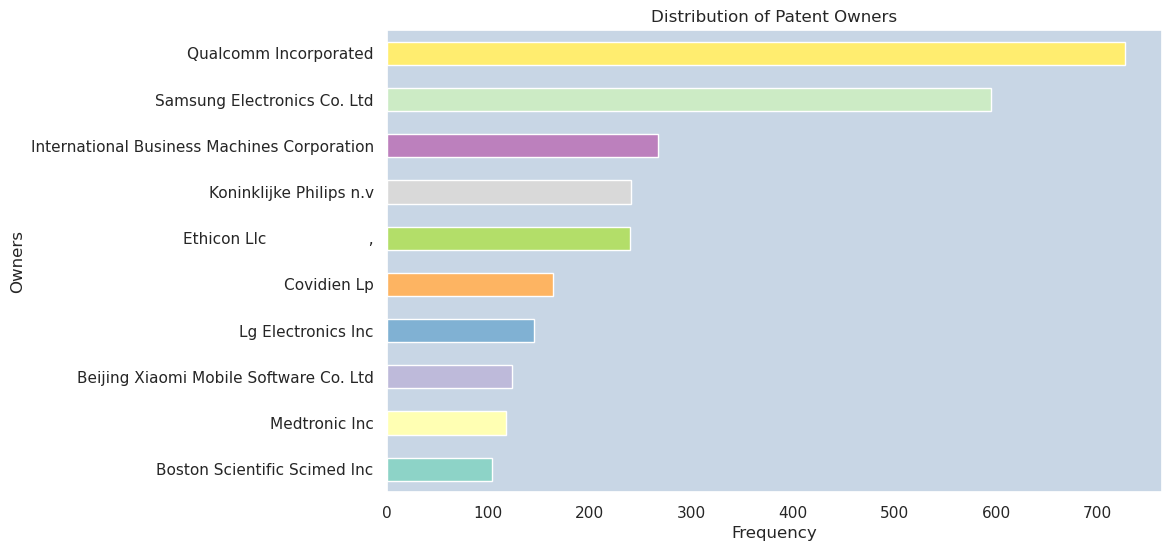

In [75]:
# Plot the distribution of owners 
# Calculate owner frequencies and sort in descending order
owner_counts = df["Owners"].value_counts().head(10)
owner_counts = owner_counts.sort_values(ascending=True)

# Plot the distribution of owners with different colors
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(owner_counts)))
owner_counts.plot(kind="barh", color=colors)
plt.xlabel("Frequency")
plt.ylabel("Owners")
plt.title("Distribution of Patent Owners")
plt.show()

In [76]:
medical_device_keywords = ["medical devices", "healthcare", "biomedical", "surgical", "pharmaceutical"]

# Filter owners related to medical devices
medical_device_owners = df[df["Owners"].str.contains('|'.join(medical_device_keywords), case=False)]

# Display the related owners
print("Owners Related to Medical Devices:")
print(medical_device_owners["Owners"])

Owners Related to Medical Devices:
41                       Intuitive Surgical Operations Inc
57          Healthcare Evolution Llc                     ,
60       Yangzijiang Pharmaceutical Group Shanghai Hain...
67       Regeneron Pharmaceuticals Inc                 ...
74       Gyrus Acmi Inc. D/b/a Olympus Surgical Technol...
                               ...                        
15780                        Regeneron Pharmaceuticals Inc
15789                           Opiant Pharmaceuticals Inc
15802                    Intuitive Surgical Operations Inc
15858                    Intuitive Surgical Operations Inc
15859                    Intuitive Surgical Operations Inc
Name: Owners, Length: 774, dtype: object


In [77]:
medical_device_keywords = ["medical devices", "healthcare", "biomedical", "surgical", "pharmaceutical", "clinical", "diagnostic", "therapeutic", "prosthetic", "imaging", "monitoring", "rehabilitation", "biotechnology", "medical technology", "healthcare equipment", "life sciences", "bioengineering", "clinical devices", "medical equipment"]

# Filter owners related to medical devices
medical_device_owners = df[df["Owners"].str.contains('|'.join(medical_device_keywords), case=False)]

# Display the related owners
print("Owners Related to Medical Devices:")
print(medical_device_owners["Owners"])

Owners Related to Medical Devices:
4                                    Bardy Diagnostics Inc
35                                Corcept Therapeutics Inc
41                       Intuitive Surgical Operations Inc
57          Healthcare Evolution Llc                     ,
60       Yangzijiang Pharmaceutical Group Shanghai Hain...
                               ...                        
15802                    Intuitive Surgical Operations Inc
15817                               Biora Therapeutics Inc
15843         Shenzhen Keya Medical Technology Corporation
15858                    Intuitive Surgical Operations Inc
15859                    Intuitive Surgical Operations Inc
Name: Owners, Length: 1196, dtype: object


## Family Jurisdiction

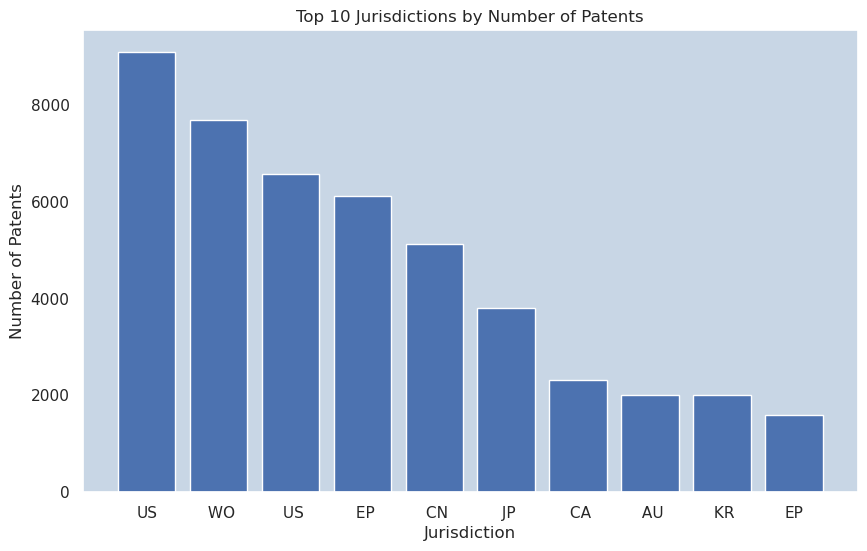

In [81]:
# Split the countries in each row and create a new DataFrame
countries_df = df["Family Jurisdiction"].str.split(",", expand=True).stack().reset_index(level=0).rename(columns={0: "Jurisdiction"})

# Count the occurrences of each jurisdiction
jurisdiction_counts = countries_df["Jurisdiction"].value_counts().head(10)

# Visualize the distribution of the top 10 jurisdictions
plt.figure(figsize=(10, 6))
plt.bar(jurisdiction_counts.index, jurisdiction_counts.values)
plt.xlabel("Jurisdiction")
plt.ylabel("Number of Patents")
plt.title("Top 10 Jurisdictions by Number of Patents")
plt.xticks()
plt.show()

## Grant Date

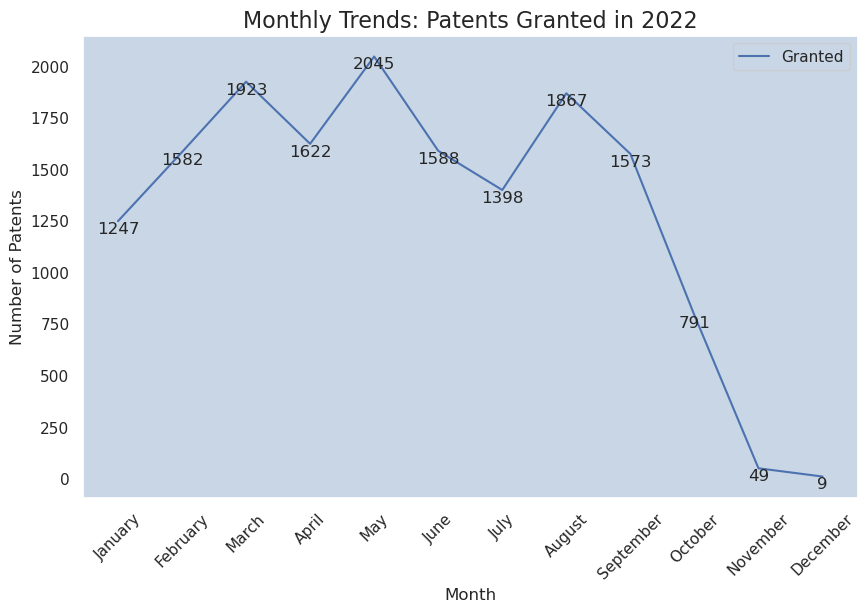

In [83]:
# Convert the "Granted Date" column to datetime
df["Granted Date"] = pd.to_datetime(df["Granted Date"])

# Extract the month component from the granted date
df["Granted Month"] = df["Granted Date"].dt.month.apply(lambda x: calendar.month_name[x])

# Calculate the number of patents granted in each month
granted_month_counts = df["Granted Month"].value_counts().sort_index()

# Sort the months in chronological order
granted_month_counts = granted_month_counts.reindex(
    list(calendar.month_name)[1:], axis=0
)

# Visualize the monthly trends
plt.figure(figsize=(10, 6))
plt.plot(granted_month_counts.index, granted_month_counts.values, label="Granted")

# Add labels for the number of patents in each month
for x, y in zip(granted_month_counts.index, granted_month_counts.values):
    plt.text(x, y, str(y), ha="center", va="top")

plt.xlabel("Month", fontsize = 12)
plt.ylabel("Number of Patents", fontsize = 12)
plt.title("Monthly Trends: Patents Granted in 2022", fontsize = 16)
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Abstract and Claims

In [60]:
# Load the dataset and select the Claims columns
df = pd.read_csv("Cleaned_Patent_2022.csv")
claims = df["Claims"].tolist()

# Check and convert non-string values to empty strings
claims = [str(claim) for claim in claims]

# Tokenize the text
stop_words = set(stopwords.words("english"))
claims_tokens = [word_tokenize(claim.lower()) for claim in claims]

# Remove stopwords
claims_tokens = [[word for word in tokens if word not in stop_words] for tokens in claims_tokens]

# Convert tokens back to text
claims_texts = [' '.join(tokens) for tokens in claims_tokens]

In [61]:
# Word Frequency
claims_vectorizer = CountVectorizer()
claims_word_freq = claims_vectorizer.fit_transform(claims_texts)
claims_words = claims_vectorizer.get_feature_names()

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
# The most common words in claims
claims_word_counts = zip(claims_words, claims_word_freq.sum(axis=0).tolist()[0])
sorted_claims_word_counts = sorted(claims_word_counts, key=lambda x: x[1], reverse=True)
top_claims_words = sorted_claims_word_counts[:10]
print("Top 10 most common words in claims:")
for word, count in top_claims_words:
    print(f"{word}: {count}")

Top 10 most common words in claims:
wherein: 341012
claim: 260644
first: 238801
one: 212731
second: 194823
least: 144490
method: 132930
data: 130790
device: 125767
comprising: 120815


In [63]:
# TF-IDF
claims_tfidf_vectorizer = TfidfVectorizer()
claims_tfidf = claims_tfidf_vectorizer.fit_transform(claims_texts)
claims_tfidf_scores = zip(claims_words, claims_tfidf.sum(axis=0).tolist()[0])
sorted_claims_tfidf_scores = sorted(claims_tfidf_scores, key=lambda x: x[1], reverse=True)
top_claims_tfidf = sorted_claims_tfidf_scores[:10]
print("Top 10 most important words in claims (TF-IDF):")
for word, score in top_claims_tfidf:
    print(f"{word}: {score}")

Top 10 most important words in claims (TF-IDF):
wherein: 800.8682668742949
first: 678.1659492483237
claim: 642.7919739377081
second: 560.7697848233372
data: 513.3834050406022
one: 513.3066216553887
device: 496.97240906187346
method: 440.39750109842913
image: 434.27036412405977
least: 390.39560667651944


# Number of unique codes for each class


## SubGroup 

In [25]:
df = pd.read_csv("Data_Preprocessed_SubGroup.csv")

# Extract the first occurrence of each subclass
unique_subgroup = df['Classification Codes'].str.split(',', expand=True)[0]

# Count the unique codes
print(f"Number of unique subclass_ids: {unique_subgroup.nunique()}")

Number of unique subclass_ids: 2692


## MainGroup

In [27]:
df = pd.read_csv("Data_Preprocessed_MainGroup.csv")

# Extract the first occurrence of each subclass
unique_maingroup = df['Classification Codes'].str.split(',', expand=True)[0]

# Count the unique codes
print(f"Number of unique subclass_ids: {unique_maingroup.nunique()}")

Number of unique subclass_ids: 731


## SubClass

In [28]:
df = pd.read_csv("Data_Preprocessed_Subclass.csv")

# Extract the first occurrence of each subclass
unique_subclass = df['Classification Codes'].str.split(',', expand=True)[0]

# Count the unique codes
print(f"Number of unique subclass_ids: {unique_subclass.nunique()}")

Number of unique subclass_ids: 186


## Class

In [29]:
df = pd.read_csv("Data_Preprocessed_Class.csv")

# Extract the first occurrence of each subclass
unique_class = df['Classification Codes'].str.split(',', expand=True)[0]

# Count the unique codes
print(f"Number of unique subclass_ids: {unique_class.nunique()}")

Number of unique subclass_ids: 64


## Section

In [18]:
df = pd.read_csv("Data_Preprocessed_Section.csv")

all_codes = [code for code_list in df['Classification Codes'] for code in code_list]

letter_codes = [code for code in all_codes if any(char.isalpha() for char in code)]

unique_letter_codes_count = len(set(letter_codes))

print("Number of unique section:", unique_letter_codes_count)

Number of unique section: 8
